In [18]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os.path
import numbers
datadir = '/Users/billiemeadowcroft/Dropbox/Tether/PlottingMembraneLine/Data2Beads/'
plotsdir = '/Users/billiemeadowcroft/Dropbox/Tether/PlottingMembraneLine/Plots/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def dist3D(x1,y1,z1,x2,y2,z2):
    dist = np.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2)+(z1-z2)*(z1-z2))
    
    return dist

def angle(x1,y1,z1):
    r = np.sqrt(x1*x1+y1*y1+z1*z1)
    if x1==0:
        theta  = np.pi/2
    else:
        theta= np.arctan(y1/x1)
    phi =np.arccos(z1/r)
    if x1 <0:
        phi = -phi
    return phi, theta,r

In [20]:
tmax = 2000000 #1000000 works well 
AvNum = 1100
tquib = 500*AvNum
NumBins = 500

In [ ]:
clrs = ['#2A0944','#3FA796','#FEC260', '#A10035','pink','lightsalmon']

arc1 = [10,28] #[10,11,12,18,28]
seed_10 = [3,11,18] #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
seed_28 = [1,2,3]
seeds = [seed_10,seed_28]
TEQIB=200
phii = np.linspace(-np.pi,np.pi,NumBins)
for a in range(len(arc1)):
    
    BinnedBen = np.zeros(NumBins)
    BinnedBin = np.zeros(NumBins)
    BinnedStren = np.zeros(NumBins)
    Number = np.zeros(NumBins)
    
    for s in range(2): 
        seed = seeds[a]
        fadd1 = "/memline2beads_arc1_"+str(arc1[a])+"_sigma_5.0_D0_6_seed_"+str(seed[s])+".dat"
        timesteps = 1
        phis =[]
        ens = []
        bens = []
        strens = []
        binds = []
        rs = []
        fname = ""
        sum_bend = np.zeros(5000)
        print(fname)     
        if (os.path.exists(datadir  + fname+fadd1)):
            print('yep')
            data = pandas.read_csv(datadir  + fname+fadd1, sep=' ', header = 'infer')
            #print(data.keys())

            x1,y1,z1 = data.x,data.y,data.z
            Bin,Ben,Str =  data.bind,data.bend,data.str
            Ben_ = Ben.values
            print(Ben)
            #Ben__ = Ben_.reshape(-1,5883)
            #Ben__=Ben_[1:,:].astype(float)
            #print(Ben__) #.values.astype(float)
            #Ben,Bin,Str = data.bend, data.bind,data.str
            #print(len(Tot)/5882)
            print(x1[1340])
            flag = 0
            #AvNum = 0
            for ii in range(tmax):
                i = ii +tquib
                if (x1[i] == str('x')): 
                    if sum_bend[timesteps] >= 230 and flag == 0:
                        TEQIB = timesteps
                        flag = 1
                    timesteps +=1
                else:
                    sum_bend[timesteps] += float(Ben_[i])
                    phi1 = angle(float(x1[i]),float(y1[i]),float(z1[i]))[0]
                    r1 = angle(float(x1[i]),float(y1[i]),float(z1[i]))[2]
                    phis.append(phi1)
                    rs.append(r1)
                    bens.append(float(Ben[i]))
                    strens.append(float(Str[i]))
                    binds.append(float(Bin[i]))
    
        print(timesteps)
    
        for ii in range(len(phis)-TEQIB*AvNum):
            i = ii+TEQIB*AvNum
            #if sum_bend[timesteps]
            for j in range(NumBins-1):
                if phis[i] > phii[j] and phis[i] < phii[j+1]:
                    BinnedBen[j] += bens[i]
                    BinnedBin[j] += binds[i]
                    BinnedStren[j] += strens[i]
                    Number[j] +=1
    if a==0:
        BenAverage10 = np.divide(BinnedBen,Number)
        BinAverage10 = np.divide(BinnedBin,Number)    
        StrAverage10 = np.divide(BinnedStren,Number)  
    elif a==1:
        BenAverage28 = np.divide(BinnedBen,Number)
        BinAverage28 = np.divide(BinnedBin,Number)    
        StrAverage28 = np.divide(BinnedStren,Number)  


yep
0           0.15
1           0.15
2           0.15
3           0.15
4           0.16
            ... 
11427776    0.16
11427777    0.13
11427778    0.16
11427779    0.13
11427780    0.14
Name: bend, Length: 11427781, dtype: object
7.58
1717


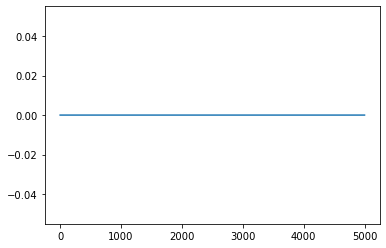

In [16]:
writedir = '/Users/billiemeadowcroft/Dropbox/Tether/PlottingMembraneLine/'

filename  = 'MembraneLine2BeadsArc10_v1.dat'
f = open(writedir+filename,'w')
for p in range(NumBins-1):
    f.write(str(phii[p])+' '+str(BenAverage10[p]) +' '+str(BinAverage10[p]) +' '+str(StrAverage10[p]) +'\n')
f.close()

fig,ax = plt.subplots()
np.arange(1,timesteps,1)
ax.plot(sum_bend)
#ax.set_ylim([170,250])

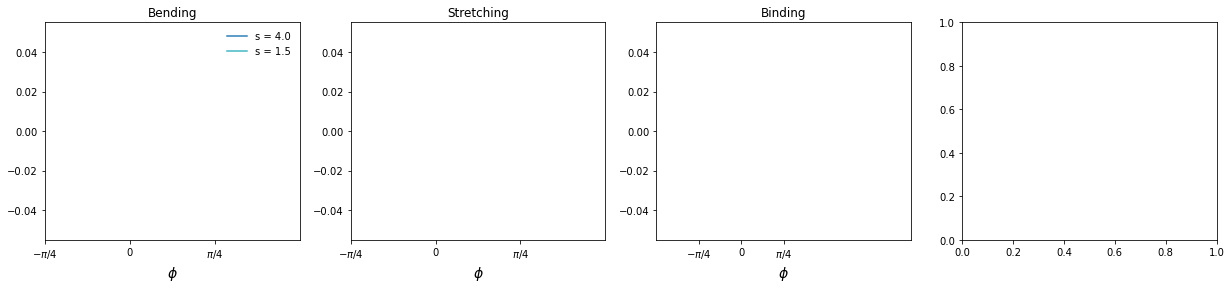

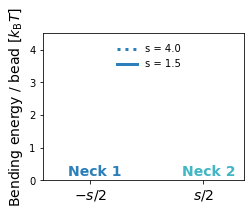

In [9]:
clrs = ['#2A0944','#A10035'] #,'tab:blue','#3FA796', 'lightsalmon','pink']
clrs = ['#2c7fb8','#41b6c4','#7fcdbb'] #,'#3FA796','#FEC260', '#A10035','lightsalmon','pink']
#clrs = ['#a6bddb','#1c9099']
fig2,ax2 = plt.subplots(1,4, figsize = (21,4))

ax2[0].plot(phii,BenAverage10,color = clrs[0], label = 's = 4.0')
ax2[0].plot(phii,BenAverage28,color = clrs[1], label = 's = 1.5')
ax2[0].set_xticks([-np.pi,-np.pi/4,0,np.pi/4,np.pi])
ax2[0].set_xticklabels([r'$-\pi$',r'$-\pi/4$','0',r'$\pi/4$',r'$\pi$'])
ax2[0].set_xlabel(r'$\phi$',fontsize = 14)
#ax2[1].set_ylabel("Energy proxy")
ax2[0].set_xlim([-np.pi/4,4*np.pi/8])
ax2[0].set_title('Bending')
ax2[0].legend(frameon=False)


ax2[2].plot(phii,BinAverage10,color = clrs[0])
ax2[2].plot(phii,BinAverage28,color = clrs[1])
ax2[2].set_xticks([-np.pi,-np.pi/8,0,np.pi/8,np.pi])
ax2[2].set_xticklabels([r'$-\pi$',r'$-\pi/4$','0',r'$\pi/4$',r'$\pi$'])
ax2[2].set_xlabel(r'$\phi$',fontsize = 14)
#ax2[2].set_ylabel("Energy proxy")
ax2[2].set_xlim([-np.pi/4,4*np.pi/8])
ax2[2].set_title('Binding')


ax2[1].plot(phii,StrAverage10,color = clrs[0])
ax2[1].plot(phii,StrAverage28,color = clrs[1])
ax2[1].set_xticks([-np.pi,-np.pi/4,0,np.pi/4,np.pi])
ax2[1].set_xticklabels([r'$-\pi$',r'$-\pi/4$','0',r'$\pi/4$',r'$\pi$'])
ax2[1].set_xlabel(r'$\phi$',fontsize = 14)
#ax2[3].set_ylabel("Energy proxy")
ax2[1].set_xlim([-np.pi/4,4*np.pi/8])
ax2[1].set_title('Stretching')
#fname = "Tau0_arc1_"+str(arc1)+"_arc2_"+str(arc2)+"_LineEnergy.pdf"
#fig2.savefig(plotsdir + fname)

fig,ax = plt.subplots(1,figsize = (4,3))
#s = 
#r = 
#0 = 
f = 4 #WHHHYY
ax.text(-np.pi/8-0.18,0.15,'Neck 1', color = clrs[0], fontsize = 14, fontweight = 'bold')
ax.text(0.55-0.18,0.15,'Neck 2', color = clrs[1], fontsize = 14, fontweight = 'bold')
#ax.text(np.pi/8+0.82-0.15,-2,'Neck 3', color = clrs[5], fontsize = 14, fontweight = 'bold')
ax.plot(phii[8:255],f*BenAverage28[0:247],color = clrs[0],linewidth = 3,linestyle = ':',label = 's = 4.0')
ax.plot(phii[0:235],f*BenAverage10[17:252],color = clrs[0],linewidth = 3, label = 's = 1.5')
ax.plot(phii[282:312],f*BenAverage10[252:282],color = clrs[1],linewidth = 3)
ax.plot(phii[255:320],f*BenAverage28[248:313],color = clrs[1],linewidth = 3,linestyle = ':')
#ax.set_xlabel(r'$\phi$',fontsize = 14)
ax.set_xticks([-np.pi,-np.pi/8+0.0,0.55,np.pi])
ax.set_xticklabels([r'$-\pi$',r'$- s/2$',r'$s/2$',r'$\pi$'], fontsize = 14)
ax.set_xlim([-np.pi/4,phii[320]])
ax.set_ylim([0,4.5])
ax.set_ylabel(r"Bending energy$~/~$bead [$k_{\mathrm{B}}T$]", fontsize = 14)
#ax.set_title("Membrane neck bead energy", fontsize = 14)
ax.legend(frameon=False, loc = [0.35,0.73])
#fig.tight_layout()
fig.subplots_adjust(top = 0.8)
fig.subplots_adjust(bottom = 0.12)
fig.subplots_adjust(left = 0.2)
plotname = '2Bead_28_10_NeckEnergies_v2.pdf'
#fig.savefig(plotsdir+plotname)
#fig3,ax3 = plt.subplots()

#ax3.plot(phii[150:230],-EnAverage20[150:230]+EnAverage10[162:242], label = 'Bud 1 difference')
#ax3.plot(phii[150:230],-EnAverage20[150:230]+EnAverage10[162:242], label = 'Bud 2 difference')
#ax3.legend(frameon=False)



Some information about combining plots

In [13]:
arc1s = [10,20]
arc2s = [22,25]


ax.text(-np.pi/8+0.0-0.15,-2,'Neck 1', color = clrs[0], fontsize = 14, fontweight = 'bold')
ax.text(0.3-0.15,-2,'Neck 2', color = clrs[4], fontsize = 14, fontweight = 'bold')
ax.text(np.pi/8+0.49-0.15,-2,'Neck 3', color = clrs[5], fontsize = 14, fontweight = 'bold')
ax.plot(phii[150:230],-EnAverage10[162:242]-7.5,color = clrs[0],linewidth = 3, alpha = 0.7,label = 'r = 1.6, s = 3.0')
ax.plot(phii[150:230],-EnAverage20[150:230]-7.5,color = clrs[0],linewidth = 3,linestyle = ':',label = 'r = 3.2, s = 3.2')
ax.plot(phii[252:292],-EnAverage10[242:282]-7.5,color = clrs[4],linewidth = 3, alpha = 0.7)
ax.plot(phii[230:300],-EnAverage20[230:300]-7.5,color = clrs[4],linewidth = 3,linestyle = ':')
#ax.set_xlabel(r'$\phi$',fontsize = 14)
ax.plot(phii[293:343],-EnAverage10[282:332]-7.5,color = clrs[5], linewidth = 3, alpha = 0.7)
ax.plot(phii[300:370],-EnAverage20[300:370]-7.5,color = clrs[5],linewidth = 3,linestyle = ':')
ax.set_xticks([-np.pi,-np.pi/8+0.0,0.3,np.pi/8+0.49,np.pi])
ax.set_xticklabels([r'$-\pi$',r'- r','0',r's',r'$\pi$'], fontsize = 14)
ax.set_xlim([-np.pi/4,4*np.pi/8])
ax.set_ylim([-3,18])
ax.set_ylabel("Energy [$k_{\mathrm{B}}T$]", fontsize = 14)
ax.legend(frameon=False, loc = [0.05,0.83])
plotname = 'BuddEnergyDifferences_22_25_alltime.pdf'
fig.savefig(plotsdir+plotname)

arc1s = [10,20]
arc2s = [22,35]

ax.text(-np.pi/8+0.0-0.15,-2,'Neck 1', color = clrs[0], fontsize = 14, fontweight = 'bold')
ax.text(0.35-0.15,-2,'Neck 2', color = clrs[4], fontsize = 14, fontweight = 'bold')
ax.text(np.pi/8+0.82-0.15,-2,'Neck 3', color = clrs[5], fontsize = 14, fontweight = 'bold')
ax.plot(phii[150:230],-EnAverage10[162:242]-7.5,color = clrs[0],linewidth = 3, alpha = 0.7,label = 'r = 1.6, s = 3.0')
ax.plot(phii[150:230],-EnAverage20[150:230]-7.5,color = clrs[0],linewidth = 3,linestyle = ':',label = 'r = 3.2, s = 3.2')
ax.plot(phii[257:297],-EnAverage10[242:282]-7.5,color = clrs[4],linewidth = 3, alpha = 0.7)
ax.plot(phii[230:300],-EnAverage20[230:300]-7.5,color = clrs[4],linewidth = 3,linestyle = ':')
#ax.set_xlabel(r'$\phi$',fontsize = 14)
ax.plot(phii[320:370],-EnAverage10[282:332]-7.5,color = clrs[5], linewidth = 3, alpha = 0.7)
ax.plot(phii[300:370],-EnAverage20[300:370]-7.5,color = clrs[5],linewidth = 3,linestyle = ':')
ax.set_xticks([-np.pi,-np.pi/8+0.0,0.35,np.pi/8+0.82,np.pi])
ax.set_xticklabels([r'$-\pi$',r'- r','0',r's',r'$\pi$'], fontsize = 14)
ax.set_xlim([-np.pi/4,4*np.pi/8])
ax.set_ylim([-3,18])
ax.set_ylabel("Energy [$k_{\mathrm{B}}T$]", fontsize = 14)
ax.legend(frameon=False, loc = [0.05,0.83])
#plotname = 'BuddEnergyDifferences_22_35_alltime.pdf'
#fig.savefig(plotsdir+plotname)

IndexError: list index out of range

In [ ]:
f = open(plotsdir+fname,'w')
f.write('phi En20 En10\n')
for i in range(len(phii)):
    f.write(str(phii[i])+' '+str(EnAverage10[i])+' '+str(EnAverage20[i])+'\n')
f.close()


In [ ]:
fadd1 = "/memline2beads_arc1_10_sigma_5.0_D0_6_seed_1Bud.dat"


for a in range(1): 
    #r = []
    timesteps = 1
    phis10 =[]
    phis20 =[]
    ens = []
    bens = []
    strens = []
    binds = []
    rs = []


    if (os.path.exists(datadir  + fname+fadd1)):
        print('yep')
        data = pandas.read_csv(datadir  + fname+fadd1, sep=' ', header = 'infer')
        print(data.keys())

        x1,y1,z1 = data.x,data.y,data.z
        Ben,Bin,Str = data.bend, data.bind,data.str
        print(x1[1340])
        for ii in range(tmax):
            i = ii #+5882*tquib
            if (x1[i] == str('x')): #need to index 2 less than the first 'timestep' line in data here
                timesteps +=1
            else:
                phi1 = angle(float(x1[i]),float(y1[i]),float(z1[i]))[0]
                r1 = angle(float(x1[i]),float(y1[i]),float(z1[i]))[2]
                if s==0:
                    phis10.append(phi1)
                elif s== 1:
                    phis20.append(phi1)
                rs.append(r1)
                bens.append(float(Ben[i]))
                strens.append(float(Str[i]))
                binds.append(float(Bin[i]))
#---------Binning------------#

NumBins = 500
BinnedEn = np.zeros(NumBins)
BinnedBen = np.zeros(NumBins)
BinnedBin = np.zeros(NumBins)
BinnedStren = np.zeros(NumBins)
Number = np.zeros(NumBins)
phii = np.linspace(-np.pi,np.pi,NumBins)
#print(NumBins)
for i in range(len(phis10)):
    for j in range(NumBins-1):
        if phis[i] > phii[j] and phis[i] < phii[j+1]:
            BinnedBen[j] += bens[i]
            BinnedBin[j] += binds[i]
            BinnedStren[j] += strens[i]
            Number[j] +=1
            
BenAverageB = np.divide(BinnedBen,Number)
BinAverageB = np.divide(BinnedBin,Number)    
StrAverageB = np.divide(BinnedStren,Number) 
                
print(timesteps)